In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.dates as mdates
from matplotlib.dates import DateFormatter

In [2]:
df = pd.read_excel('Jakarta Pollution Dataset Original - Kaggle.xlsx')

df

,DATE,LOCATION,PM10,SO2,CO,O3,NO2,MAX,RESULT
0,2020-01-01,DKI1 (Bunderan HI),30,20,10,32,9,32,BAIK
1,2020-01-02,DKI1 (Bunderan HI),27,22,12,29,8,29,BAIK
2,2020-01-03,DKI1 (Bunderan HI),39,22,14,32,10,39,BAIK
3,2020-01-04,DKI1 (Bunderan HI),34,22,14,38,10,38,BAIK
4,2020-01-05,DKI1 (Bunderan HI),35,22,12,31,9,35,BAIK
...,...,...,...,...,...,...,...,...,...
1825,2020-12-27,DKI5 (Kebon Jeruk) Jakarta Barat,18,32,4,41,9,41,BAIK
1826,2020-12-28,DKI5 (Kebon Jeruk) Jakarta Barat,22,33,5,35,3,35,BAIK
1827,2020-12-29,DKI5 (Kebon Jeruk) Jakarta Barat,15,28,4,27,9,28,BAIK
1828,2020-12-30,DKI5 (Kebon Jeruk) Jakarta Barat,16,7,3,21,2,21,BAIK


In [3]:
x = df[['MAX','PM10']]
y = df[['O3']]

In [4]:
print('Variabel Independen/X\n',x)

Variabel Independen/X
       MAX  PM10
0      32    30
1      29    27
2      39    39
3      38    34
4      35    35
...   ...   ...
1825   41    18
1826   35    22
1827   28    15
1828   21    16
1829   24    18

[1830 rows x 2 columns]


In [5]:
print('Variabel Dependen/Y\n',y)

Variabel Dependen/Y
       O3
0     32
1     29
2     32
3     38
4     31
...   ..
1825  41
1826  35
1827  27
1828  21
1829  24

[1830 rows x 1 columns]


In [6]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1))
scaled_x = min_max_scaler.fit_transform(x)
scaled_y= min_max_scaler.fit_transform(y)

print('Data X setelah dinormalisasi\n',scaled_x)
print('Data Y setelah dinormalisasi\n',scaled_y)

Data X setelah dinormalisasi
 [[0.16315789 0.25      ]
 [0.14736842 0.22222222]
 [0.2        0.33333333]
 ...
 [0.14210526 0.11111111]
 [0.10526316 0.12037037]
 [0.12105263 0.13888889]]
Data Y setelah dinormalisasi
 [[0.16315789]
 [0.14736842]
 [0.16315789]
 ...
 [0.13684211]
 [0.10526316]
 [0.12105263]]


In [7]:
from sklearn.model_selection import train_test_split

X_train,X_test,y_train,y_test = train_test_split(scaled_x,scaled_y,random_state=0,test_size=0.10)

In [8]:
from sklearn.ensemble import RandomForestRegressor

rf_reg = RandomForestRegressor(n_estimators=100,random_state=40,criterion='squared_error',max_depth=10,n_jobs=1)

In [9]:
rf_reg.fit(X_train,y_train)

C:\Users\Vivo Design\AppData\Local\Temp\ipykernel_3856\2805904612.py:1: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  rf_reg.fit(X_train,y_train)


RandomForestRegressor(max_depth=10, n_jobs=1, random_state=40)

In [10]:
pred_rf = rf_reg.predict(X_test)

pred_rf

array([0.23355754, 0.381448  , 0.16248242, 0.25020461, 0.17321866,
       0.27093617, 0.34029595, 0.44529698, 0.03800748, 0.02884994,
       0.03863175, 0.17113454, 0.20366173, 0.12297137, 0.30429017,
       0.51249637, 0.41221548, 0.64052632, 0.32701946, 0.03263851,
       0.23826313, 0.14655045, 0.23377976, 0.40904455, 0.31117085,
       0.18936433, 0.17113454, 0.42499262, 0.57867105, 0.3980456 ,
       0.35779906, 0.13631963, 0.53279386, 0.28300143, 0.51523243,
       0.51500207, 0.39333094, 0.30184773, 0.16248242, 0.28266698,
       0.16408486, 0.19061243, 0.27503204, 0.5217713 , 0.36768921,
       0.22745712, 0.33721764, 0.19054276, 0.19698522, 0.1631269 ,
       0.25879903, 0.42159755, 0.22777947, 0.16515418, 0.38187   ,
       0.33154758, 0.25385875, 0.1576807 , 0.16520119, 0.06254563,
       0.37509532, 0.31396395, 0.43423672, 0.48194083, 0.25879903,
       0.2633159 , 0.25387337, 0.34745553, 0.75026316, 0.06680836,
       0.36519242, 0.16540075, 0.25879903, 0.02859539, 0.31396

In [11]:
from sklearn.metrics import mean_squared_error
from math import sqrt

mse_rf = mean_squared_error(y_pred=pred_rf,y_true=y_test)
print('MSE RF : ',mse_rf)

rmse_rf = sqrt(mse_rf)
print('RMSE RF : ',rmse_rf)

MSE RF :  0.0024107140132640257
RMSE RF :  0.049099022528600565


In [12]:
pred_rf_dua = rf_reg.predict(scaled_x)

pred_rf_dua

array([0.15404517, 0.14156016, 0.16248242, ..., 0.14134471, 0.10194498,
       0.13382396])

In [13]:
pred_rf_dua = pred_rf_dua.reshape(-1,1)

In [14]:
pred_rf_dua = min_max_scaler.inverse_transform(pred_rf_dua)

pred_rf_dua

array([[30.26858276],
       [27.89643117],
       [31.87166045],
       ...,
       [27.85549464],
       [20.36954545],
       [26.4265518 ]])

In [15]:
pred_rf_dua = pred_rf_dua.reshape(-1)

pred_rf_dua

array([30.26858276, 27.89643117, 31.87166045, ..., 27.85549464,
       20.36954545, 26.4265518 ])

In [16]:
df_predict_rf_dua = pd.DataFrame({'Prediction RF':pred_rf_dua})

df_predict_rf_dua

,Prediction RF
0,30.268583
1,27.896431
2,31.871660
3,35.522940
4,32.426143
...,...
1825,37.516258
1826,31.031500
1827,27.855495
1828,20.369545


In [17]:
df = df.merge(df_predict_rf_dua,how='left',left_index=True,right_index=True)

df

,DATE,LOCATION,PM10,SO2,CO,O3,NO2,MAX,RESULT,Prediction RF
0,2020-01-01,DKI1 (Bunderan HI),30,20,10,32,9,32,BAIK,30.268583
1,2020-01-02,DKI1 (Bunderan HI),27,22,12,29,8,29,BAIK,27.896431
2,2020-01-03,DKI1 (Bunderan HI),39,22,14,32,10,39,BAIK,31.871660
3,2020-01-04,DKI1 (Bunderan HI),34,22,14,38,10,38,BAIK,35.522940
4,2020-01-05,DKI1 (Bunderan HI),35,22,12,31,9,35,BAIK,32.426143
...,...,...,...,...,...,...,...,...,...,...
1825,2020-12-27,DKI5 (Kebon Jeruk) Jakarta Barat,18,32,4,41,9,41,BAIK,37.516258
1826,2020-12-28,DKI5 (Kebon Jeruk) Jakarta Barat,22,33,5,35,3,35,BAIK,31.031500
1827,2020-12-29,DKI5 (Kebon Jeruk) Jakarta Barat,15,28,4,27,9,28,BAIK,27.855495
1828,2020-12-30,DKI5 (Kebon Jeruk) Jakarta Barat,16,7,3,21,2,21,BAIK,20.369545


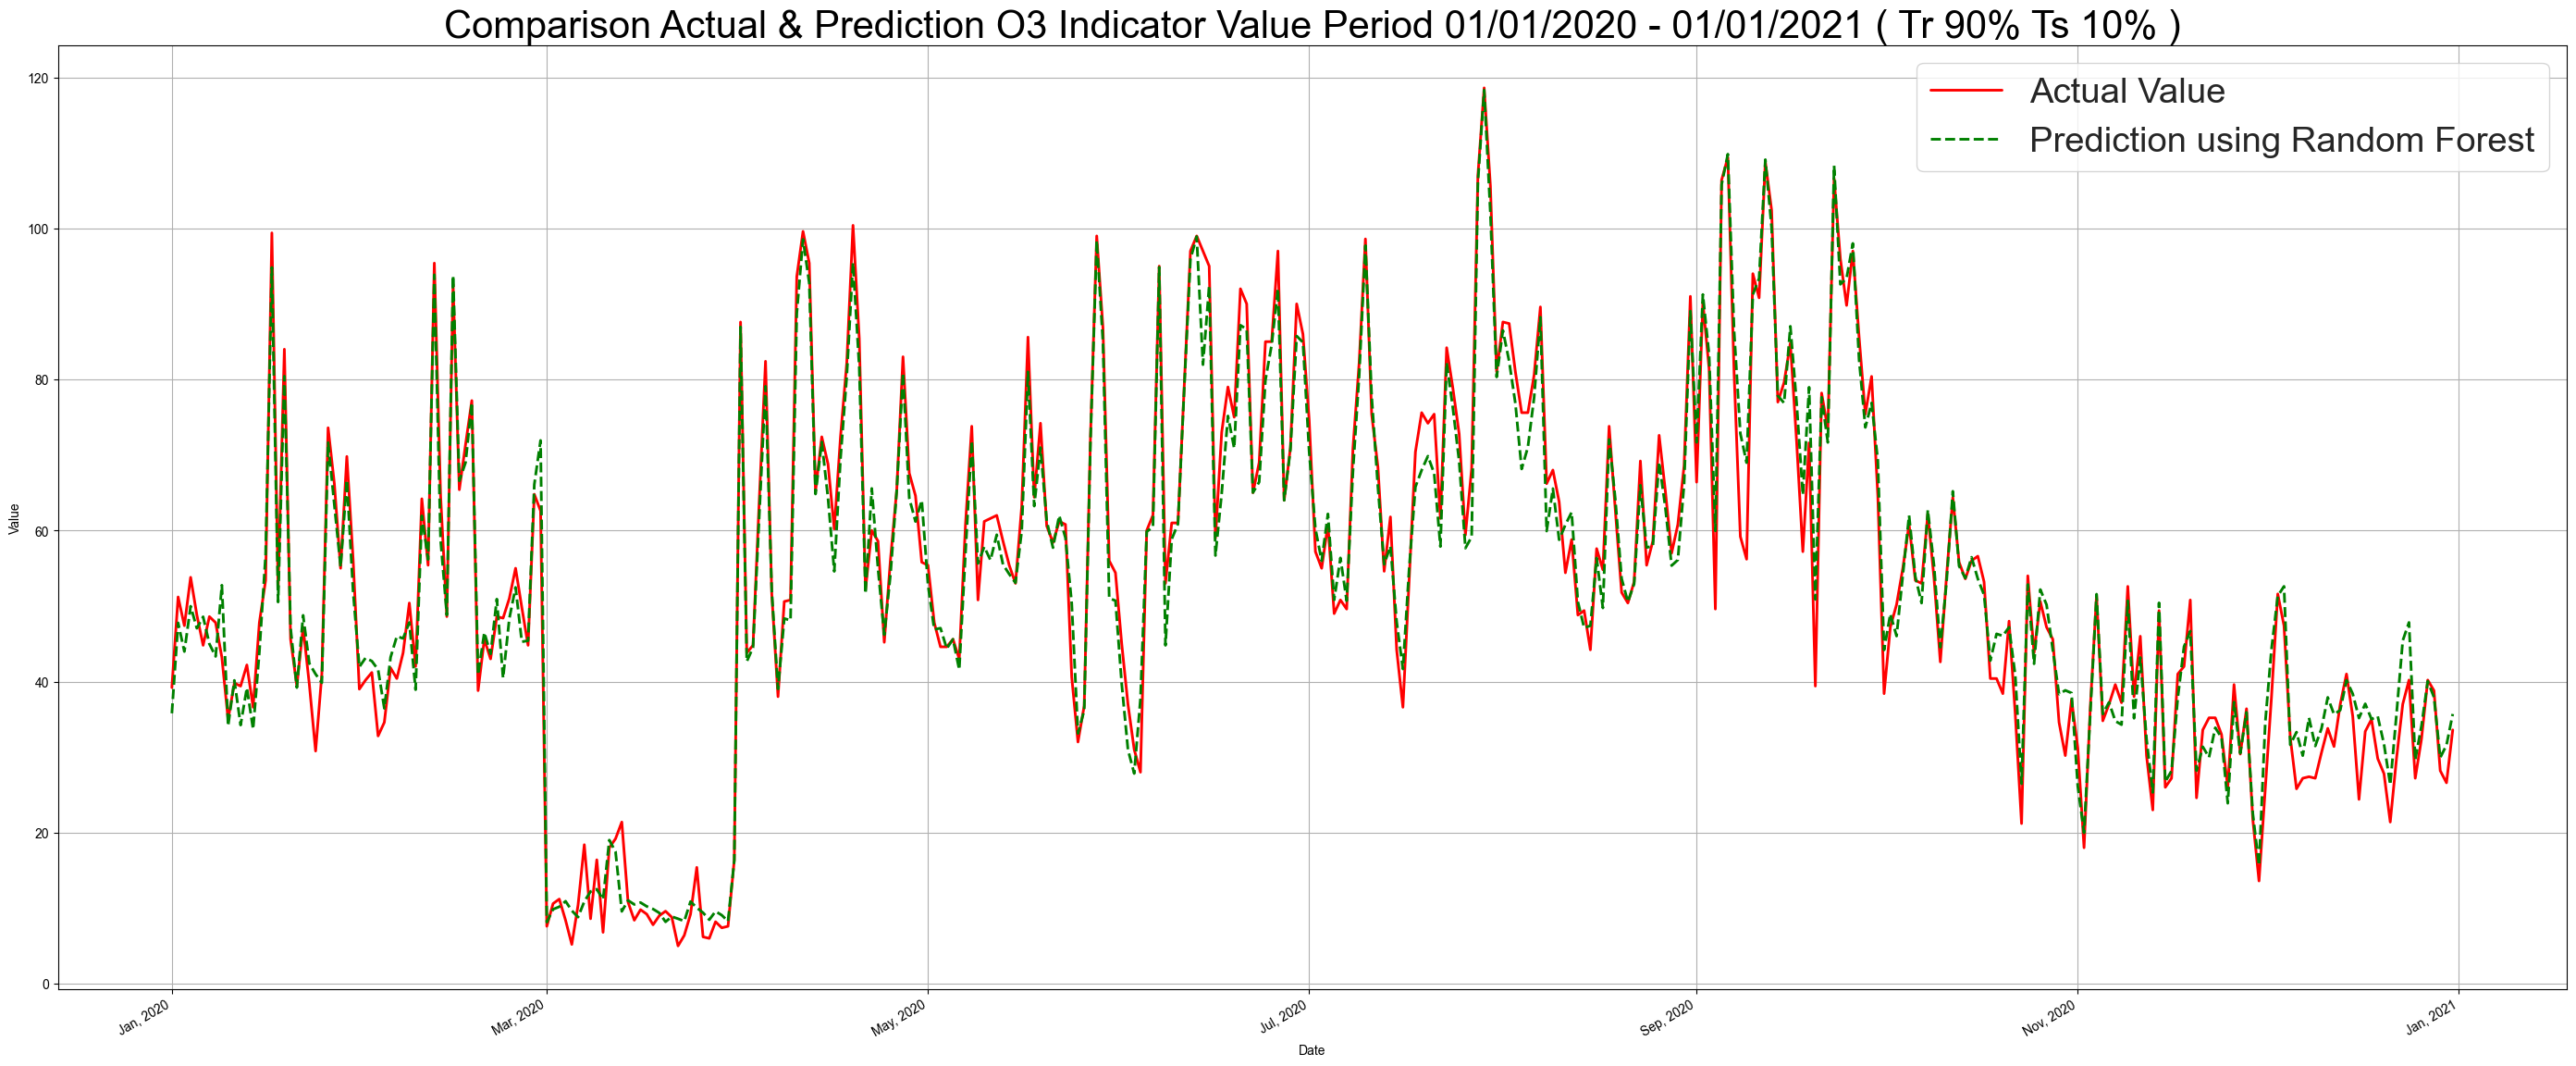

<Figure size 640x480 with 0 Axes>

In [18]:
half_year_locator = mdates.MonthLocator(interval=2)
year_month_formatter = mdates.DateFormatter("%Y-%m")
month_year_formatter = mdates.DateFormatter('%b, %Y')

fig,ax = plt.subplots(figsize=(35,15))
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter)
ax.xaxis.set_major_formatter(month_year_formatter)

fig.autofmt_xdate()
sns.set_theme(style='white',font_scale=2.5)

sns.lineplot(x=df['DATE'],y=df['O3'],data=df,linestyle='solid',color='red',linewidth=2.1,label='Actual Value',errorbar=None)

sns.lineplot(x=df['DATE'],y=df['Prediction RF'],data=df,linestyle='dashed',color='green',linewidth=2.1,label='Prediction using Random Forest',errorbar=None)

plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparison Actual & Prediction O3 Indicator Value Period 01/01/2020 - 01/01/2021 ( Tr 90% Ts 10% )')
plt.grid(True)
plt.show()

plt.tight_layout()


In [19]:
import tensorflow as tf

In [20]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [21]:
nn = Sequential()
nn.add(Dense(24,activation='relu',input_shape=(X_train.shape[1],)))
nn.add(Dense(32,activation='relu'))
nn.add(Dense(1))

nn.compile(loss='mean_squared_error',optimizer='adam')

In [22]:
nn.fit(X_train,y_train,epochs=50,batch_size=32,validation_data=(X_test,y_test))

Epoch 1/50
52/52 [==============================] - 1s 7ms/step - loss: 0.0117 - val_loss: 0.0066
Epoch 2/50
52/52 [==============================] - 0s 3ms/step - loss: 0.0040 - val_loss: 0.0034
Epoch 3/50
52/52 [==============================] - 0s 3ms/step - loss: 0.0028 - val_loss: 0.0028
Epoch 4/50
52/52 [==============================] - 0s 3ms/step - loss: 0.0024 - val_loss: 0.0026
Epoch 5/50
52/52 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0026
Epoch 6/50
52/52 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0025
Epoch 7/50
52/52 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0025
Epoch 8/50
52/52 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0025
Epoch 9/50
52/52 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0025
Epoch 10/50
52/52 [==============================] - 0s 3ms/step - loss: 0.0023 - val_loss: 0.0025
Epoch 11/50
52/52 [

In [23]:
nn_prediction = nn.predict(X_test)

nn_prediction

6/6 [==============================] - 0s 0s/step


array([[0.24584681],
       [0.35665813],
       [0.17084298],
       [0.22528946],
       [0.19345975],
       [0.23535833],
       [0.30380204],
       [0.4426333 ],
       [0.04045121],
       [0.04548084],
       [0.04031248],
       [0.16192439],
       [0.21624076],
       [0.15108678],
       [0.29288894],
       [0.48936877],
       [0.41044965],
       [0.64020264],
       [0.3017452 ],
       [0.04104656],
       [0.23729372],
       [0.14733213],
       [0.25629345],
       [0.41265783],
       [0.2719455 ],
       [0.1892522 ],
       [0.16192439],
       [0.45203623],
       [0.56039673],
       [0.39840177],
       [0.32081202],
       [0.06614432],
       [0.54428184],
       [0.24990126],
       [0.5132486 ],
       [0.50074774],
       [0.38955405],
       [0.31854832],
       [0.17084298],
       [0.26831838],
       [0.17298299],
       [0.21104157],
       [0.27841187],
       [0.5056828 ],
       [0.32463685],
       [0.20636714],
       [0.38574448],
       [0.093

In [24]:
mse_nn = mean_squared_error(y_pred=nn_prediction,y_true=y_test)
print('MSE NN : ',mse_nn)

rmse_nn = sqrt(mse_nn)
print('RMSE NN : ',rmse_nn)

MSE NN :  0.0023125993677113126
RMSE NN :  0.048089493319344846


In [25]:
from sklearn.ensemble import StackingRegressor
from sklearn.linear_model import RidgeCV

meta_learner = RidgeCV(alphas=[0.1,1.0,10.0])

In [26]:
from sklearn.base import BaseEstimator,RegressorMixin
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

class KerasRegressor(BaseEstimator, RegressorMixin):
    def __init__(self,nn):
        self.nn = nn

    def fit(self,X,y):
        self.nn.fit(X,y,epochs=50,batch_size=32,verbose=0)
        return self

    def predict(self,X_test):
        return self.nn.predict(X_test).flatten()

estimators = [
    ('rf',rf_reg),
    ('nn',KerasRegressor(nn=nn))
]

stacking_model = StackingRegressor(estimators=estimators,final_estimator=meta_learner,cv=5)


In [27]:
stacking_model.fit(X_train,y_train)

c:\Users\Vivo Design\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_stacking.py:957: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


11/11 [==============================] - 0s 1ms/step


StackingRegressor(cv=5,
                  estimators=[('rf',
                               RandomForestRegressor(max_depth=10, n_jobs=1,
                                                     random_state=40)),
                              ('nn',
                               KerasRegressor(nn=<keras.src.engine.sequential.Sequential object at 0x000001F230C8F850>))],
                  final_estimator=RidgeCV(alphas=[0.1, 1.0, 10.0]))

In [28]:
stacking_predictions = stacking_model.predict(X_test)

print('Result Stacking Regressor : ',stacking_predictions)

6/6 [==============================] - 0s 3ms/step
Result Stacking Regressor :  [0.23521812 0.36885814 0.16870595 0.23526573 0.18085395 0.24655963
 0.30775615 0.44146247 0.03415037 0.04336805 0.03414453 0.1659866
 0.20862222 0.13692301 0.2863714  0.49674603 0.40953436 0.63801488
 0.31035468 0.03652886 0.23283843 0.14507583 0.24348434 0.38691511
 0.28231147 0.18780803 0.1659866  0.44468781 0.56390778 0.39655599
 0.33922061 0.09776213 0.54180206 0.2651568  0.51165974 0.50397395
 0.38951496 0.29811006 0.16870595 0.27110189 0.16492146 0.20159453
 0.27244675 0.50813735 0.34142084 0.21245438 0.36680539 0.12799666
 0.19829106 0.16833188 0.25363041 0.41100713 0.22039253 0.17241955
 0.36225355 0.31419022 0.26438491 0.13038915 0.16058477 0.05800113
 0.37594417 0.30500057 0.42055978 0.4807791  0.25363041 0.25964366
 0.27285798 0.34496461 0.74388787 0.05337283 0.35883915 0.15759928
 0.25363041 0.02892391 0.30500057 0.46731666 0.49981112 0.49633141
 0.22168717 0.44268705 0.31068201 0.51303831 0.334

In [29]:
mse_stacking_prediction = mean_squared_error(y_test,stacking_predictions)

print('MSE - SR : ',mse_stacking_prediction)
print('RMSE - SR : ',sqrt(mse_stacking_prediction))

MSE - SR :  0.002232131846005274
RMSE - SR :  0.047245442595082905


In [30]:
stacking_predictions_dua = stacking_model.predict(scaled_x)

print('Result Stacking Regressor New : ',stacking_predictions_dua)

58/58 [==============================] - 0s 2ms/step
Result Stacking Regressor New :  [0.14303184 0.12874925 0.16870595 ... 0.12834529 0.08810009 0.10954275]


In [31]:
stacking_predictions_dua = stacking_predictions_dua.reshape(-1,1)

stacking_predictions_dua

array([[0.14303184],
       [0.12874925],
       [0.16870595],
       ...,
       [0.12834529],
       [0.08810009],
       [0.10954275]])

In [32]:
inv_stacking_predictions_dua = min_max_scaler.inverse_transform(stacking_predictions_dua)

inv_stacking_predictions_dua

array([[28.17604975],
       [25.46235668],
       [33.05412978],
       ...,
       [25.38560585],
       [17.73901802],
       [21.81312309]])

In [33]:
inv_stacking_predictions_dua = inv_stacking_predictions_dua.reshape(-1)

inv_stacking_predictions_dua

array([28.17604975, 25.46235668, 33.05412978, ..., 25.38560585,
       17.73901802, 21.81312309])

In [34]:
df_predict_stacking_dua = pd.DataFrame({'Prediction Stacking':inv_stacking_predictions_dua})

df_predict_stacking_dua

,Prediction Stacking
0,28.176050
1,25.462357
2,33.054130
3,33.605828
4,30.943863
...,...
1825,38.013881
1826,29.913663
1827,25.385606
1828,17.739018


In [35]:
df = df.merge(df_predict_stacking_dua,how='left',left_index=True,right_index=True)

df

,DATE,LOCATION,PM10,SO2,CO,O3,NO2,MAX,RESULT,Prediction RF,Prediction Stacking
0,2020-01-01,DKI1 (Bunderan HI),30,20,10,32,9,32,BAIK,30.268583,28.176050
1,2020-01-02,DKI1 (Bunderan HI),27,22,12,29,8,29,BAIK,27.896431,25.462357
2,2020-01-03,DKI1 (Bunderan HI),39,22,14,32,10,39,BAIK,31.871660,33.054130
3,2020-01-04,DKI1 (Bunderan HI),34,22,14,38,10,38,BAIK,35.522940,33.605828
4,2020-01-05,DKI1 (Bunderan HI),35,22,12,31,9,35,BAIK,32.426143,30.943863
...,...,...,...,...,...,...,...,...,...,...,...
1825,2020-12-27,DKI5 (Kebon Jeruk) Jakarta Barat,18,32,4,41,9,41,BAIK,37.516258,38.013881
1826,2020-12-28,DKI5 (Kebon Jeruk) Jakarta Barat,22,33,5,35,3,35,BAIK,31.031500,29.913663
1827,2020-12-29,DKI5 (Kebon Jeruk) Jakarta Barat,15,28,4,27,9,28,BAIK,27.855495,25.385606
1828,2020-12-30,DKI5 (Kebon Jeruk) Jakarta Barat,16,7,3,21,2,21,BAIK,20.369545,17.739018


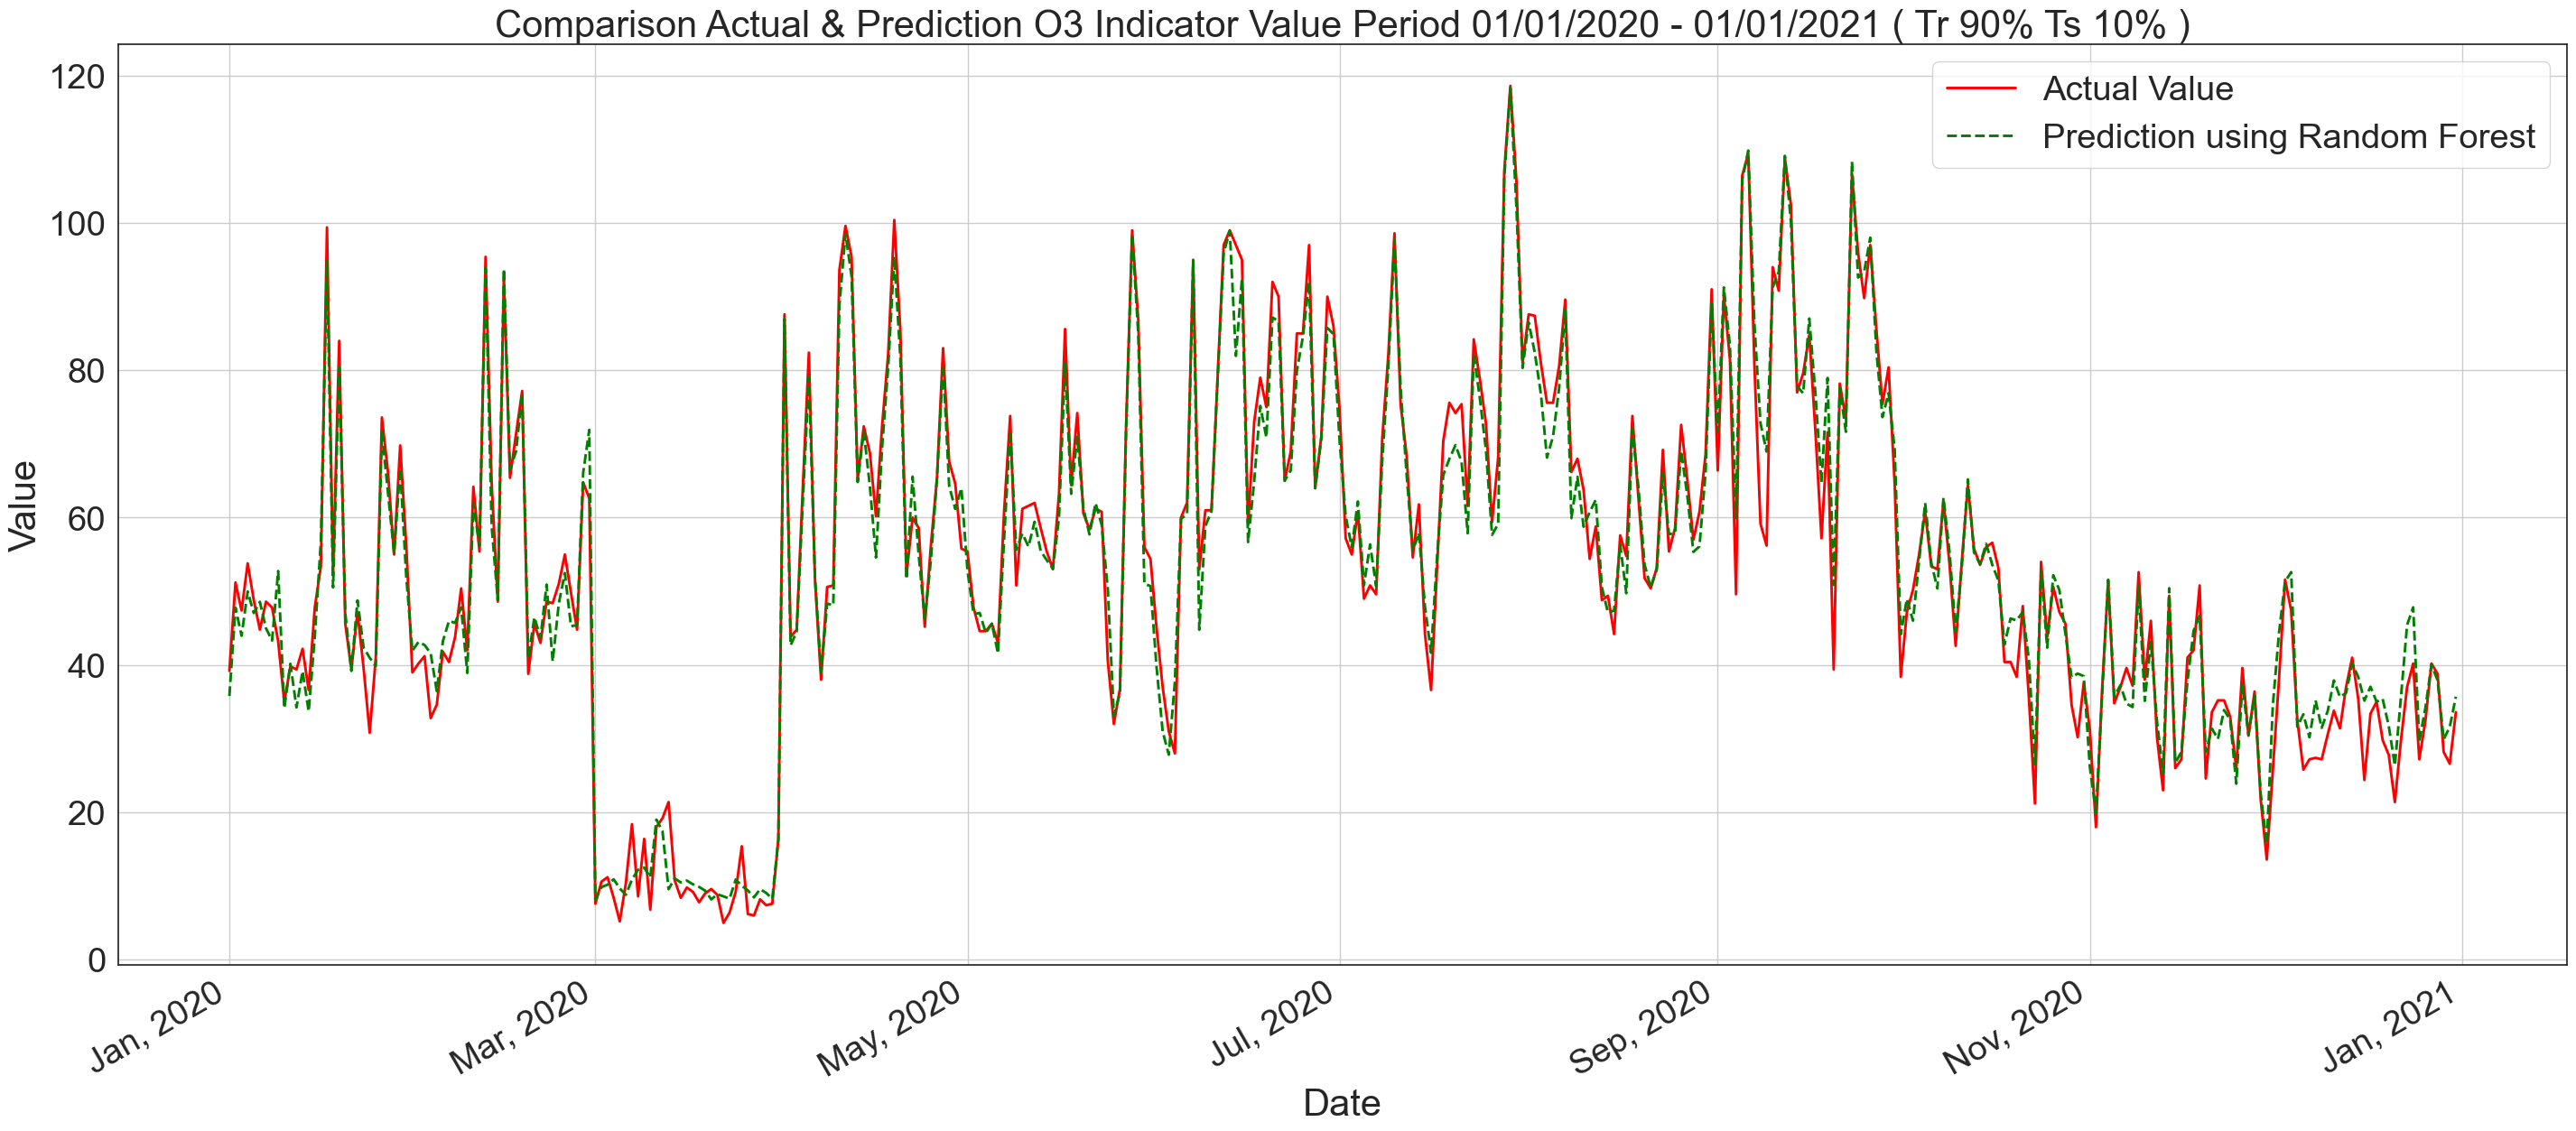

<Figure size 640x480 with 0 Axes>

In [37]:
half_year_locator = mdates.MonthLocator(interval=2)
year_month_formatter = mdates.DateFormatter("%Y-%m")
month_year_formatter = mdates.DateFormatter('%b, %Y')

fig,ax = plt.subplots(figsize=(35,15))
ax.xaxis.set_major_locator(half_year_locator)
ax.xaxis.set_major_formatter(year_month_formatter)
ax.xaxis.set_major_formatter(month_year_formatter)

fig.autofmt_xdate()
sns.set_theme(style='white',font_scale=2.5)

sns.lineplot(x=df['DATE'],y=df['O3'],data=df,linestyle='solid',color='red',linewidth=2.1,label='Actual Value',errorbar=None)

sns.lineplot(x=df['DATE'],y=df['Prediction RF'],data=df,linestyle='dashed',color='green',linewidth=2.1,label='Prediction using Random Forest',errorbar=None)

# sns.lineplot(x=df['DATE'],y=df['Prediction Stacking'],data=df,linestyle='dashed',color='blue',linewidth=2.1,label='Prediction using Random Forest - Neural Network',errorbar=None)

plt.legend()
plt.xlabel('Date')
plt.ylabel('Value')
plt.title('Comparison Actual & Prediction O3 Indicator Value Period 01/01/2020 - 01/01/2021 ( Tr 90% Ts 10% )')
plt.grid(True)
plt.show()

plt.tight_layout()
